In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [2]:
%matplotlib inline
plt.style.use('ggplot')

Output()

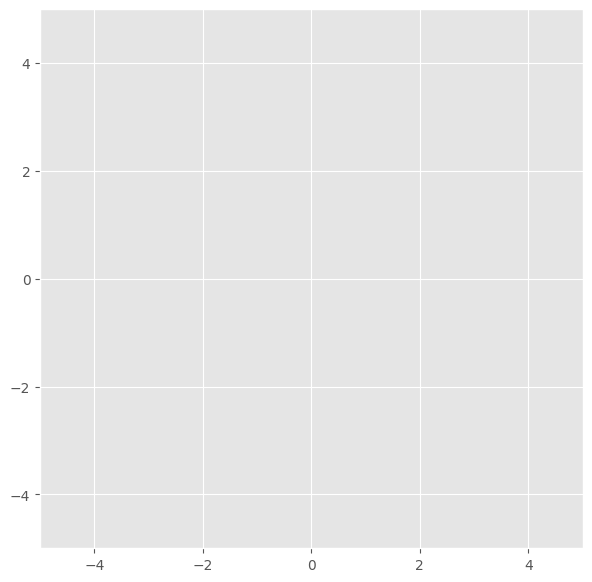

In [3]:

# Definimos el sistema de ecuaciones diferenciales
def equations_of_motion(state, t, potential_type, params):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    
    # Selección de potencial
    if potential_type == "Newtoniano":
        F_r = -params['G'] * params['M'] * params['m'] / r**2
    elif potential_type == "Armónico":
        F_r = -params['k'] * r
    elif potential_type == "Personalizado":
        F_r = -params['a']/r**2 + params['b']/r**3
    
    # Componentes de la aceleración
    ax = F_r * x / (params['m'] * r)
    ay = F_r * y / (params['m'] * r)
    
    return [vx, vy, ax, ay]

# Función para resolver la órbita
def compute_orbit(potential_type, G, M, m, k, a, b):
    params = {
        'G': G,
        'M': M,
        'm': m,
        'k': k,
        'a': a,
        'b': b
    }
    
    initial_conditions = [2.0, 0.0, 0.0, 1.5]  # x, y, vx, vy
    t = np.linspace(0, 20, 300)
    
    solution = odeint(equations_of_motion, initial_conditions, t, args=(potential_type, params))
    return solution[:,0], solution[:,1]

# Función para crear la animación
def create_animation(x, y):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid(True)
    
    line, = ax.plot([], [], 'b-', lw=1)
    point, = ax.plot([], [], 'ro', ms=8)
    
    def animate(i):
        line.set_data(x[:i], y[:i])
        point.set_data(x[i], y[i])
        return line, point
    
    ani = FuncAnimation(fig, animate, frames=len(x), interval=30, blit=True)
    plt.close()
    return HTML(ani.to_jshtml())

# Interfaz interactiva
potential_selector = widgets.Dropdown(
    options=["Newtoniano", "Armónico", "Personalizado"],
    value="Newtoniano",
    description='Potencial:'
)

params_ui = {
    'G': widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='G'),
    'M': widgets.FloatSlider(value=100.0, min=1.0, max=500.0, step=10.0, description='M'),
    'm': widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='m'),
    'k': widgets.FloatSlider(value=0.5, min=0.1, max=5.0, step=0.1, description='k'),
    'a': widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='a'),
    'b': widgets.FloatSlider(value=0.1, min=0.0, max=2.0, step=0.1, description='b')
}

# Función de actualización
def update_plot(potential_type, G, M, m, k, a, b):
    x, y = compute_orbit(potential_type, G, M, m, k, a, b)
    return create_animation(x, y)

# Crear la interfaz interactiva
output = widgets.interactive_output(update_plot, {
    'potential_type': potential_selector,
    'G': params_ui['G'],
    'M': params_ui['M'],
    'm': params_ui['m'],
    'k': params_ui['k'],
    'a': params_ui['a'],
    'b': params_ui['b']
})

# Organizar la interfaz
param_boxes = widgets.VBox([
    params_ui['G'],
    params_ui['M'],
    params_ui['m'],
    params_ui['k'],
    params_ui['a'],
    params_ui['b']
])

ui = widgets.HBox([potential_selector, param_boxes])

# Mostrar todo el conjunto
display(ui, output)

def potential_harmonic(m1, m2, k, r):
    return 0.5 * k * (r - (m1 + m2))**2